<a href="https://colab.research.google.com/github/rdukewiesenb/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

1.  Look at the data. Choose a feature, and plot its relationship with the target.

In [ ]:
# Before we do anything, let's make sure that our data's tidy
# Yes, it is!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

In [ ]:
df['loft'].value_counts()

0    46733
1     2085
Name: loft, dtype: int64

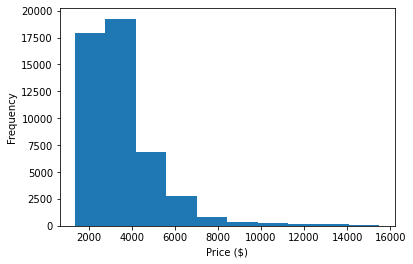

In [ ]:
# And let's also do exploratory plotting for the 'price' characteristic

import matplotlib.pyplot as plt

df['price'].plot(kind='hist')
plt.xlabel('Price ($)');

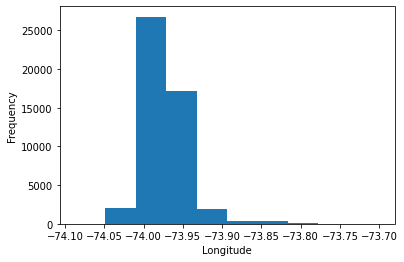

In [ ]:
# as well as the longitude
df['longitude'].plot(kind='hist')
plt.xlabel('Longitude')
plt.ylabel('Frequency');

In [ ]:
# if we want to find out the cost to rent, we should first combine 

In [ ]:
# Now, we can split our target from our feature matrix
# double brackets in X in order to make the feature two-dimensional

target = 'price'
y = df[target]
X = df[['longitude']]


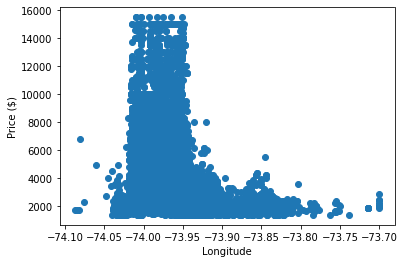

In [ ]:
# let's make a scatter plot that will display the relationship between the target and feature matrix

plt.scatter(df['longitude'], df['price'])
plt.xlabel('Longitude')
plt.ylabel('Price ($)')
plt.show()

2. Use scikit-learn for linear regression with one feature.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
y_pred = [y.mean()] * len(y)
print("First 10 items in the y_pred list: \n", y_pred[:10])

First 10 items in the y_pred list: 
 [3579.5609816051456, 3579.5609816051456, 3579.5609816051456, 3579.5609816051456, 3579.5609816051456, 3579.5609816051456, 3579.5609816051456, 3579.5609816051456, 3579.5609816051456, 3579.5609816051456]


In [ ]:
# What's our MAE before doing a regression?
print("Baseline MAE (before regression): ", mean_absolute_error(y, y_pred))

Baseline MAE (before regression):  1201.5251847945751


In [ ]:
# Now, let's do the regression

# 1. Instatiate the model (find all of the instances)
model = LinearRegression()

In [ ]:
# 2. Fit the model to the data
print("Fitting the model: ", model.fit(X, y))

Fitting the model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
# 3. Make predictions with the model
y_pred2 = model.predict(X)
y_pred2

array([3116.16010954, 3486.78591358, 4024.34648061, ..., 3843.62811334,
       4151.46194232, 2728.68767803])

In [ ]:
# Now, let's check our metrics

# ~$50 decrease

print("Baseline MAE (after regression): ", mean_absolute_error(y, y_pred2))

Baseline MAE (after regression):  1144.2536062365434


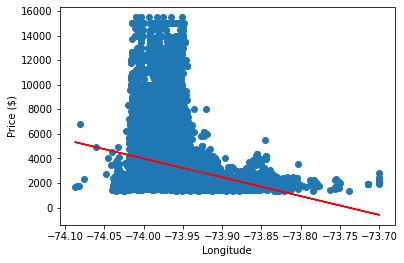

In [ ]:
# Let's investigate our model
# plt.plot is for our line of best fit
plt.scatter(X, y)
plt.plot(X, y_pred2, color='red', label='Linear Model')
plt.xlabel('Longitude')
plt.ylabel('Price ($)');

 3. Define a function to make new predictions and explain the model coefficient.

In [ ]:
print(f'RENT = {model.intercept_} + {model.coef_[0]} * Longitude')

RENT = -1129321.795081219 + -15315.115869638641 * Longitude


**Stretch goals:**

1. Do linear regression with two or more features.

In [ ]:
# multiple leinear regression:
  # features == 'bedrooms' and 'bathrooms'


In [ ]:
# convert 'bedrooms' to a float

df['bedrooms'] = df['bedrooms'].astype('float')

In [ ]:
df['bedrooms'].dtypes

dtype('float64')

In [ ]:
# for clarity, we will retype our target
features = ['bedrooms', 'bathrooms']

target = 'price'
y = df[target]
X = df[features]


In [ ]:
# However, before I can even get close to performing a linear regression on these features,
# I need to do a train split test

from sklearn.model_selection import train_test_split

# Now, I'll create the training and test sets
# inside of train_test_split, put in the entire dataframe, because
# we apply TT-Splits to entire dataframes
train, test = train_test_split(df)

In [ ]:
# 
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
# need to create a y_pred

y_pred = [y.mean()] * len(y)
print(y_pred)

[1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273, 1.2017903232414273,

In [ ]:
# and a model

model = LinearRegression()

In [ ]:
# now let's fit the model 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# so that we use the model to make predictions
# we're using X_test so that we can make our predictions
# because X_test contains our true values

y_pred3 = model.predict(X_test)
y_pred3

array([5444.61473037, 2950.55200995, 2572.01422138, ..., 2950.55200995,
       2950.55200995, 4386.85226444])

In [ ]:
# Now, we'll do an r2 score 

from sklearn.metrics import r2_score

r2_score(y_test, y_pred3)

0.5164897675701923

**Note:** Train test splits are usually not used to plot

Text(0.5, 0, 'Number of bathrooms')

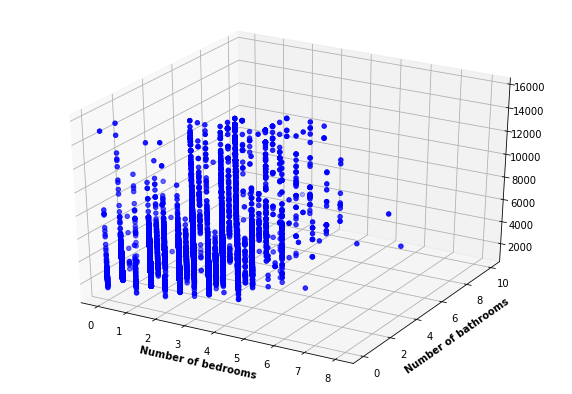

In [ ]:
# In order to plot on three dimensions, I'll need to define new variables for each feature I want to use
x = df['bedrooms']
y = df['bathrooms']
z = df['price']

# and create a figure
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")

# AH, now we create the plot
ax.scatter3D(x, y, z, color='blue')
plt.xlabel('Number of bedrooms', fontweight="bold")
plt.ylabel('Number of bathrooms', fontweight='bold')
# zlabel('Price')

ValueError: ignored

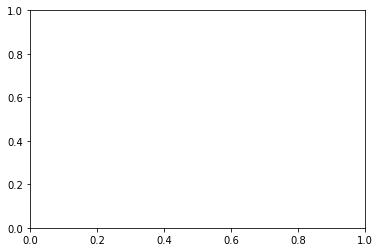

In [ ]:
plt.scatter3D(x, y, z, color)

Text(0, 0.5, 'Price ($)')

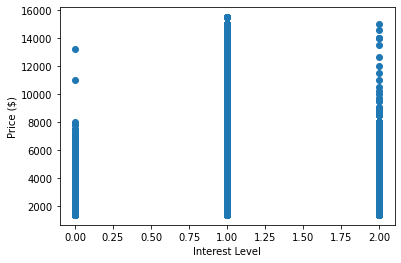

In [ ]:
# let's (scatter) plot!

plt.scatter(df[features], df['price'])
plt.xlabel('Interest Level')
plt.ylabel('Price ($)')

# rename the x-ticks so that they're intelligable to others
plt.x_ticklabels('')

Extra practice

In [ ]:
# 'interest_levels'

# df['interest_level_code'] = df['interest_level'].astype('category').cat.codes
# print(df['interest_level_code'].value_counts())